In [71]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
import lightgbm as lgb
import itertools
import warnings
from pylab import rcParams

rcParams['figure.figsize'] = 8, 5
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn-whitegrid')

1. Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по 1 месяцу.

In [16]:
df = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])

In [17]:
df.shape

(145374, 13)

In [18]:
#по месяцам
df_m = df.resample('M').mean()
df_m.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


In [19]:
df_m.shape

(200, 12)

2. Подберите параметры модели SARIMAX для этого ряда.

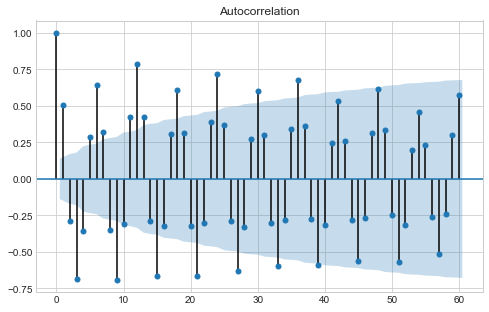

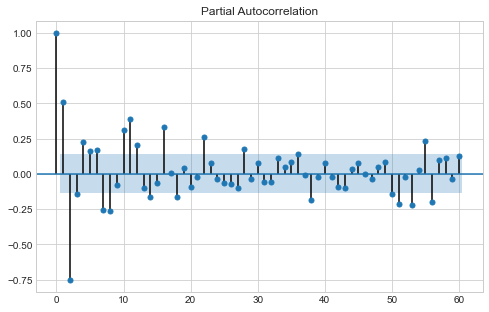

In [20]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
sm.graphics.tsa.plot_acf(df_m['PJME_MW'].values, lags=12*5)
plt.show()

#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(df_m['PJME_MW'].values, lags=12*5)
plt.show()

In [22]:
# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 1, 12)


In [29]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_m['PJME_MW'].values[:-12],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC:4416.269672223332
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC:4015.3605742791474
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC:3714.4659328111006
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC:3153.6893700282526
ARIMA(0, 0, 0)x(0, 1, 1, 12)3 - AIC:2927.716207132728
ARIMA(0, 0, 0)x(0, 1, 2, 12)3 - AIC:2695.3223171841537
ARIMA(0, 0, 1)x(0, 0, 0, 12)3 - AIC:4259.479361221288
ARIMA(0, 0, 1)x(0, 0, 1, 12)3 - AIC:4012.922621936983
ARIMA(0, 0, 1)x(0, 0, 2, 12)3 - AIC:3675.4255013529146
ARIMA(0, 0, 1)x(0, 1, 0, 12)3 - AIC:3114.023015611569
ARIMA(0, 0, 1)x(0, 1, 1, 12)3 - AIC:2890.4757577812406
ARIMA(0, 0, 1)x(0, 1, 2, 12)3 - AIC:2653.7508364113446
ARIMA(0, 0, 2)x(0, 0, 0, 12)3 - AIC:4206.520029700199
ARIMA(0, 0, 2)x(0, 0, 1, 12)3 - AIC:3925.5304731997094
ARIMA(0, 0, 2)x(0, 0, 2, 12)3 - AIC:3653.2702719995987
ARIMA(0, 0, 2)x(0, 1, 0, 12)3 - AIC:3099.1118556134215
ARIMA(0, 0, 2)x(0, 1, 1, 12)3 - AIC:2874.7748056872642
ARIMA(0, 0, 2)x(0, 1, 2, 12)3 - AIC:2642.792771835251
ARIMA(0, 1, 0)x(0

ARIMA(2, 2, 1)x(0, 0, 1, 12)3 - AIC:3194.6973714377104
ARIMA(2, 2, 1)x(0, 0, 2, 12)3 - AIC:2982.015548613859
ARIMA(2, 2, 1)x(0, 1, 0, 12)3 - AIC:3158.33543848417
ARIMA(2, 2, 1)x(0, 1, 1, 12)3 - AIC:2880.3925539206125
ARIMA(2, 2, 1)x(0, 1, 2, 12)3 - AIC:2636.160690186898
ARIMA(2, 2, 2)x(0, 0, 0, 12)3 - AIC:3339.4547331996428
ARIMA(2, 2, 2)x(0, 0, 1, 12)3 - AIC:3115.9610155722203
ARIMA(2, 2, 2)x(0, 0, 2, 12)3 - AIC:2902.6388789857288
ARIMA(2, 2, 2)x(0, 1, 0, 12)3 - AIC:3136.826641144524
ARIMA(2, 2, 2)x(0, 1, 1, 12)3 - AIC:2849.077784861155
ARIMA(2, 2, 2)x(0, 1, 2, 12)3 - AIC:2637.480150325795


Наименьшее значение AIC = 2613 с параметрами ARIMA(0, 1, 2)x(0, 1, 2, 12)3 - AIC  
Проведем моделирование прогноза по этим параметрам для последних 12 месяцев (и предсказание следующих 24):

In [33]:
mod = sm.tsa.statespace.SARIMAX(df_m['PJME_MW'].values[0:-12],order=[0,1,2],
                                seasonal_order=[0,1,2,12] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:',results_opt.aic)

AIC: 2613.007536103961


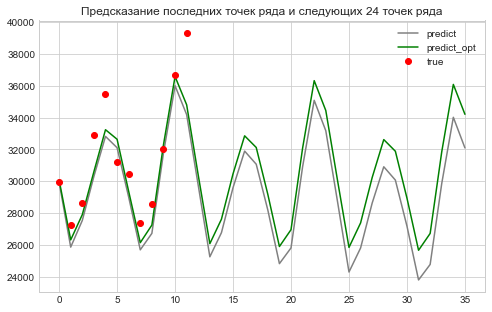

In [38]:
nforecast = 12+24  # полное число предиктов (тест + чистый предикт)

pred_dynamic = results.forecast(nforecast)    #делаем предсказание
pred_dynamic_opt = results_opt.forecast(nforecast)

plt.plot(pred_dynamic,'grey', label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(df_m['PJME_MW'].values[-12:],'or',label='true')
plt.title('Предсказание последних точек ряда и следующих 24 точек ряда')
plt.legend()

plt.show()

3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

- информационный критерий Акаике стал точнее почти в 3 раза, благорадря более сглаживанию данных до месячного уровня.
- следовательно, чем больший период для ресемплинга ряда мы берем, тем легче строить его предсказание.

4. Возмите вариант 1 или 2 
    - Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)
    - Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19  (по любой стране кроме Китая на дневных графиках )

Беру вариант 1) BRENT (недельный ресемплинг):

In [40]:
df_brent = pd.read_csv('my_BRENT2019.csv',sep = ',', index_col=[0], parse_dates=[0])
df_brent.shape

(2667, 11)

In [44]:
#по месяцам
df_brent_w = df_brent.resample('W').mean()
df_brent_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


In [46]:
df_brent_w.shape

(470, 11)

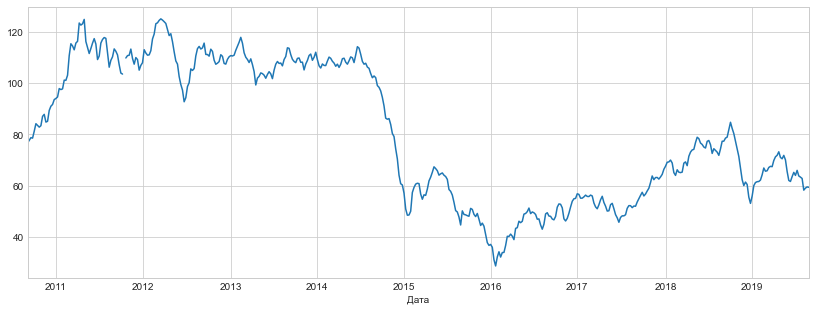

In [49]:
#посмотрим на заполненность данных
rcParams['figure.figsize'] = 14, 5
df_brent_w['Значение'].plot()

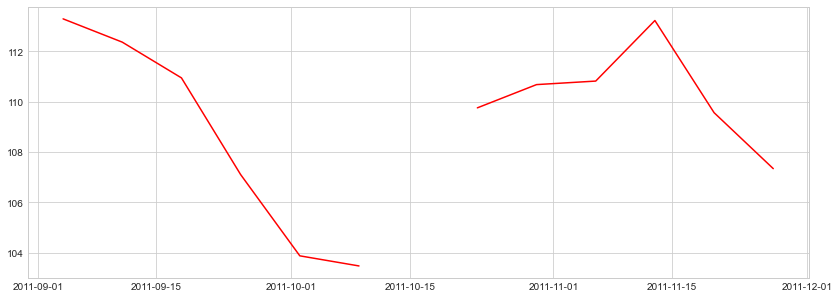

In [59]:
#Взглянем детальней на пропуск в конце 2011-го:
plt.plot(df_brent_w['2011-09-01':'2011-12-01'].index,
         df_brent_w['2011-09-01':'2011-12-01']['Значение'].values, 'r')

In [61]:
df_brent_w.loc['2011-10-01':'2011-11-01']

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-10-02,103.878333,2011.0,9.166667,23.666667,3.166667,271.666667,39.0,2.666667,0.0,0.000000,0.0
2011-10-09,103.476667,2011.0,10.000000,5.666667,4.000000,278.666667,40.0,2.666667,0.0,0.166667,0.0
2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-23,109.756667,2011.0,10.000000,21.333333,4.000000,294.333333,42.0,4.333333,0.0,0.000000,0.0
2011-10-30,110.680000,2011.0,10.000000,26.666667,4.000000,299.666667,43.0,2.666667,0.0,0.000000,0.0


Восстановим значение за одну неделю, как среднее, между соседними неделями

In [63]:
df_brent_w.loc['2011-10-16', 'Значение'] = (df_brent_w.loc['2011-10-09', 'Значение'] + 
                                            df_brent_w.loc['2011-10-23', 'Значение'])/2
df_brent_w.loc['2011-10-01':'2011-11-01']

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-10-02,103.878333,2011.0,9.166667,23.666667,3.166667,271.666667,39.0,2.666667,0.0,0.000000,0.0
2011-10-09,103.476667,2011.0,10.000000,5.666667,4.000000,278.666667,40.0,2.666667,0.0,0.166667,0.0
2011-10-16,106.616667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-23,109.756667,2011.0,10.000000,21.333333,4.000000,294.333333,42.0,4.333333,0.0,0.000000,0.0
2011-10-30,110.680000,2011.0,10.000000,26.666667,4.000000,299.666667,43.0,2.666667,0.0,0.000000,0.0


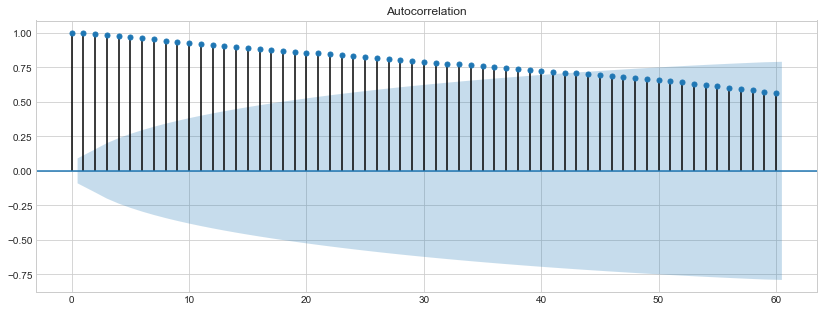

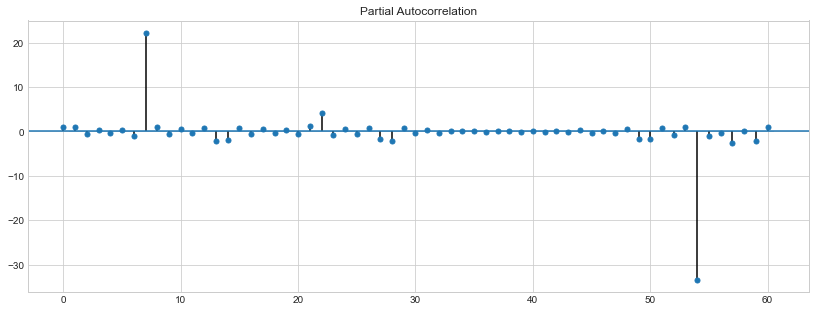

In [64]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
sm.graphics.tsa.plot_acf(df_brent_w['Значение'].values, lags=12*5)
plt.show()

#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(df_brent_w['Значение'].values, lags=12*5)
plt.show()

In [83]:
# Определим p, d и q
p = range(0, 5)
d = range(0, 3)
q = range(0, 3)

# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

In [84]:
best = ('', np.inf)
for param in pdq:
    try:
        mod = ARIMA(df_brent_w['Значение'].values[300:-52],order=param)
        results = mod.fit()
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
        if best[1] > results.aic:
            best = (param, results.aic)
    except:
        continue
print(f'Наименьшую ошибку {best[1]} дают параметры {best[0]}')

ARIMA(0, 0, 0) - AIC:882.4039687374488
ARIMA(0, 0, 1) - AIC:734.7578090885395
ARIMA(0, 1, 0) - AIC:449.7593508906527
ARIMA(0, 1, 1) - AIC:437.4993441997092
ARIMA(0, 1, 2) - AIC:439.49697162608805
ARIMA(0, 2, 0) - AIC:484.7758237114437
ARIMA(0, 2, 1) - AIC:452.68683495148804
ARIMA(0, 2, 2) - AIC:440.3607025420091
ARIMA(1, 0, 0) - AIC:461.6248575355552
ARIMA(1, 0, 1) - AIC:448.2755804182059
ARIMA(1, 0, 2) - AIC:450.22646004399223
ARIMA(1, 1, 0) - AIC:441.0297422326223
ARIMA(1, 1, 1) - AIC:439.49836869092144
ARIMA(1, 2, 0) - AIC:482.0195656609196
ARIMA(1, 2, 1) - AIC:443.75245549975597
ARIMA(2, 0, 0) - AIC:451.50768627734385
ARIMA(2, 0, 1) - AIC:450.2531070699638
ARIMA(2, 1, 0) - AIC:436.5061115081002
ARIMA(2, 1, 1) - AIC:437.0263318393633
ARIMA(2, 1, 2) - AIC:438.9381713432583
ARIMA(2, 2, 0) - AIC:473.16505320644296
ARIMA(2, 2, 1) - AIC:439.5941252859793
ARIMA(2, 2, 2) - AIC:440.22573906947673
ARIMA(3, 0, 0) - AIC:448.03094357164895
ARIMA(3, 0, 1) - AIC:449.44620924243173
ARIMA(3, 0, 2) 

In [85]:
mod = ARIMA(df_brent_w['Значение'].values[300:-52],order=(2, 1, 0))
results_opt = mod.fit()
print('AIC:',results_opt.aic)

AIC: 436.5061115081002


In [96]:
pred_dynamic_opt

(array([77.99397695, 77.75402145, 77.70702852, 77.95540679, 78.26669594,
        78.53077053, 78.76243929, 78.99341443, 79.23185878, 79.47322253,
        79.7138822 , 79.95358634, 80.19310598, 80.43278538, 80.67256767,
        80.91234981, 81.15210736, 81.39185589, 81.63160696, 81.8713611 ,
        82.11111578, 82.35086993, 82.59062374, 82.83037757, 83.07013147,
        83.30988541, 83.54963933, 83.78939324, 84.02914716, 84.26890107,
        84.50865499, 84.7484089 , 84.98816282, 85.22791673, 85.46767065,
        85.70742456, 85.94717848, 86.18693239, 86.42668631, 86.66644022,
        86.90619414, 87.14594805, 87.38570197, 87.62545588, 87.8652098 ,
        88.10496371, 88.34471763, 88.58447155, 88.82422546, 89.06397938,
        89.30373329, 89.54348721, 89.78324112, 90.02299504, 90.26274895,
        90.50250287, 90.74225678, 90.9820107 , 91.22176461, 91.46151853,
        91.70127244, 91.94102636, 92.18078027, 92.42053419, 92.6602881 ,
        92.90004202, 93.13979593, 93.37954985, 93.6

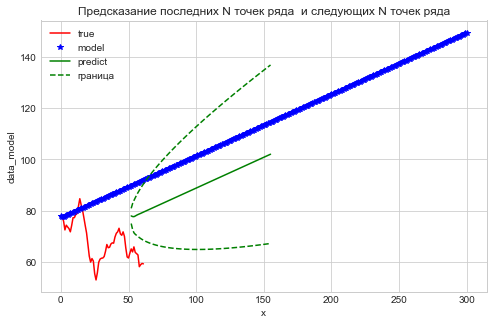

In [108]:
N = 52

pred_dynamic_opt = results_opt.forecast(2*N)
y_p = results_opt.predict(len(df_brent_w['Значение'].values[:-N]), len(df_brent_w['Значение'].values[:-N]), typ='levels')

plt.plot(df_brent_w['Значение'].values[-10-N:],'r',label ='true')
plt.plot(y_p,'*b',label ='model')
plt.plot(np.arange(2*N)+N,pred_dynamic_opt[0],'g',label ='predict')
plt.plot(np.arange(2*N)+N,pred_dynamic_opt[2][:,1],'--g', label = 'граница')
plt.plot(np.arange(2*N)+N,pred_dynamic_opt[2][:,0],'--g')
plt.xlabel('x')
plt.ylabel('data_model')
plt.title('Предсказание последних N точек ряда  и следующих N точек ряда')
plt.legend()
plt.show()


5. Оцените результат моделирования

- Судя по графику, предсказание очень линейно и, в реалиях, бесполезно.

6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии  на основе AR I MA.

- Сложно на основе двух примеров делать вывод, но подозреваю, что стационарные ряды или где первые разности стационарны, будут давать более точные прогнозы.